<!-- JPN -->
# 線形回帰と多項式回帰

※本演習資料の二次配布・再配布はお断り致します。

<!-- ENG -->
# Linear and Polynomial Regressions

※Distribution or redistribution of these exercise materials without the copyright holder’s permission is not permitted.

<!-- JPN -->
　回帰問題とは、例えば「2月24日（水）18時、予想気温6度の時の東京都目黒区の電力需要は何万キロワットか予想せよ」というように、**いくつかの要素を元に、実数値を予測する問題**のことを指す。

<!-- ENG -->
　A regression problem is **a problem that predicts a real number based on several factors**, for example, "Predict how many thousands of kilowatts the electricity demand will be in Meguro-ku, Tokyo, at 6:00 p.m. on Wednesday, February 24, when the expected temperature is 6 degrees Celsius".

<!-- JPN -->
　本日の演習では、3つの回帰予測を行うための機械学習アルゴリズムを説明する。

- **1 | 線形回帰 (Linear regression)**
- **2 | 多項式回帰 (Polynomial regression)**
- **3 | 過剰適合を防ぐ正則化（Ridge回帰）**

<!-- ENG -->
　In today's exercise, we will describe a machine learning algorithm for making three regression predictions.

- **1 | Linear regression**
- **2 | Polynomial regression**
- **3 | Norm regularization to prevent overfitting (Ridge regression)**

<!-- JPN -->
## 1 | 線形回帰 (Linear regression)

　まず、$y = f(x_1, x_2)$ を、既知データ $X, y$ を利用することで線形回帰で推定することをおこなってみる。

<!-- ENG -->
## 1 | Linear regression

　First, let's try to estimate $y = f(x_1, x_2)$ by linear regression using the known data $X, y$.

<!-- JPN -->
### 1.1 | データセットの作成

　1 で利用する仮想的なデータセットを作成する。
ここでは、$y = 3x_1 - x_2 + 2$ という線形の関係を満たすような、ノイズが無い10件のデータ $X, y$ を作っている。

<!-- ENG -->
### 1.1 | Creating a data set

　Create a hypothetical data set to be used in 1.
Here, we are making a sample $X, y$ with a sample size of 10, no noise, such that the linear relationship $y = 3x_1 - x_2 + 2$ is satisfied.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # For drawing (also used in Exercises in Fundamentals of Data Science ②)

In [2]:
# Create a data set
n_data = 10                   # Number of data sets to be created
X = np.random.rand(n_data, 2) # Randomly generate n_data sets for x
y = 3 * X[:, 0] - X[:, 1] + 2
print(X)
print(y)

[[0.32451763 0.9302534 ]
 [0.7502938  0.46266636]
 [0.40224995 0.50132657]
 [0.95152169 0.67834651]
 [0.79705082 0.09979054]
 [0.30325767 0.99006258]
 [0.71394186 0.31214047]
 [0.94103344 0.8061538 ]
 [0.61741364 0.27092284]
 [0.36339772 0.36172163]]
[2.04329949 3.78821503 2.70542329 4.17621855 4.29136191 1.91971042
 3.82968511 4.01694651 3.58131808 2.72847153]


<!-- JPN -->
　このコードで注意する点を以下にまとめておく。NumPyの使い方にも関わるので、しっかり確認しておこう。
* $X, y$ ともに10件のデータをまとめて表現している。
* $X$ は、1つのデータ $\boldsymbol{x}^T=[x_1, x_2]$ が**1つの行ベクトル**として、10件縦に重なって行列を構成している。（講義資料を読み返そう。確かに $X$ は $\boldsymbol{x}^T$ を縦に重ねたものになっている）
* Pythonでは添え字は0から始まるので、10件のデータ全ての $x_1$ を取得する、という操作は`X[:, 0]`に対応する。
  * このため、 `y = 3*X[:, 0] - X[:, 1] + 2` と記述することで10件のデータの $y$ を同時に作ることができる。
  * `X[:, 0]`は**すべて（`:`）の行の、0列目のデータを取得する**という意味であると考えよう。

<!-- ENG -->
　The following is a summary of points to aware of in this code. Since it is related to the usage of NumPy, let's check it carefully.
* $X, y$ are both represented as a set of 10 data items.
* $X$ is **a single row vector** of data $\boldsymbol{x}^T=[x_1, x_2]$, which is vertically stacked 10 times to form a matrix. (Let's read the lecture materials again. Indeed, $X$ is stacked vertically with $\boldsymbol{x}^T$
* In Python, an index starts from 0, so the operation to get $x_1$ for all 10 data items corresponds to `X[:, 0]`.
  * Therefore, we can create 10 sets data for $y$ simultaneously by writing `y = 3*X[:, 0] - X[:, 1] + 2`.
  * Consider that `X[:, 0]` means to **get the data of the 0th column of all (`:`) rows**.

<!-- JPN -->
  なお、説明の都合上、変数 $\boldsymbol{x}$ の添え字が講義資料と異なる意味で使われている場所がある。注意して読み進めてほしい。

<!-- ENG -->
  For the convenience of explanation, the index of the variable $\boldsymbol{x}$ is used in some places with a different meaning than in the lecture material. Read and proceed with caution.

<!-- JPN -->
### 1.2 | `scikit-learn` を利用した線形回帰

　まず、線形回帰を `scikit-learn` というPythonの機械学習ライブラリを用いて実行してみよう。 `scikit-learn` は機械学習の定番と言っても良いライブラリであり、今後も基盤データサイエンス演習、基盤人工知能演習 いずれも多用する。

<!-- ENG -->
### 1.2 | Linear regression using `scikit-learn`

　First, let's run linear regression using the Python machine learning library called `scikit-learn`. `scikit-learn` is a famous library for machine learning, and we will continue to use it for both Exercises in Fundamentals of Data Science and Exercises in Fundamentals of Artificial Intelligence.

<!-- JPN -->
　`scikit-learn` で用意されている関数は極めて賢く作られており、定数項の推定のための変数の追加などは内部で実行される。 `scikit-learn` で学習を行う際には、以下の順番で計算を行う。
1.   機械学習アルゴリズム（今回は線形回帰）を選択する。
2.   `fit()` を実行することでモデルを構築する。
3.   必要に応じて `model.coef_` や `model.intercept_` を使って線形モデルの各説明変数に対する重み、および定数項を確認する。

以下で実際にやってみよう。


<!-- ENG -->
　The functions provided by `scikit-learn` are extremely intelligent, and adding variables for estimating constant terms is carried out internally. When learning with `scikit-learn`, calculations are performed in the following order.
1. Select a machine learning algorithm (in this case, linear regression).
2. Build a model by running `fit()`.
3. Check the weights and constant terms for each explanatory variable in the linear model using `model.coef_` and `model.intercept_` as needed.

Let's try to put it into practice as follows.


In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# 1. Selecting a machine learning algorithm
# As if you had prepared the equation for the linear model y = w^t x + b
model = LinearRegression()

In [5]:
# 2. Building a linear model by running fit(), internally calculating 1.3
# X is entered without adding a constant term
# Input y as a one-dimensional array without vectorization
model.fit(X, y)

LinearRegression()

In [6]:
# 3. Checking the weights
print(model.coef_)      # Check the values of w_1 and w_2
print(model.intercept_) # Check the value of b (w_3)

[ 3. -1.]
2.0


<!-- JPN -->
　`model.fit()` に入れる `X`, `y` はそれぞれ行列と1次元配列であることに注意してほしい。

　printされた結果を見ると、$\boldsymbol{\hat{w}} = [3, -1], \hat b = 2$ という結果が得られ、正しく $y = 3x_1 - x_2 + 2$ を推定できていることがわかる。

　今回はデータにノイズが存在せず、 $x$ と $y$ の関係が線形で線形回帰モデルが表現できる関係になっているので、完全に予測することができている。

<!-- ENG -->
　Note that the `X`, `y` in `model.fit()` are a matrix and a one-dimensional array, respectively.

　The printed result shows that we have correctly estimated $y = 3x_1 - x_2 + 2$ with the result $\boldsymbol{\hat{w}} = [3, -1], \hat b = 2$.

　This time, there is no noise in the data, and the relationship between $x$ and $y$ is linear, a relationship that can be represented by a linear regression model, so it is perfectly predictable.

<!-- JPN -->
　次に、このモデルを使って新しいデータ $(x_1, x_2) = (10, 30), (2, 1)$ を予測してみよう。新しいデータへの予測は `predict()` メソッドを利用する。
$y = 3x_1 - x_2 + 2$ なので、この2つはそれぞれ $y = 2, 7$ となるはずである。

<!-- ENG -->
　Next, let's use this model to predict the new data $(x_1, x_2) = (10, 30), (2, 1)$. Prediction for new data is performed using the `predict()` method.
Since $y = 3x_1 - x_2 + 2$, these two should be $y = 2, 7$ respectively.

In [7]:
# Create a matrix of multiple data as we did for X.
X_new = np.array([[10, 30],
                  [2, 1]])
model.predict(X_new) # Note that the prediction results will also come out as a one-dimensional array.

array([2., 7.])

<!-- JPN -->
　これで、新しいデータに対する予測を行うことができた。

<!-- ENG -->
　This allowed us to make predictions for new data.

<!-- JPN -->
### 1.3 | NumPyを利用した線形回帰

　通常の教材などであれば、scikit-learnによる線形回帰ができればそれでおしまい…なのだが、この演習は**講義で学んだものを実際に使う**ことも1つの目的である。本日講義で学んだ**線形代数の計算に基づいて** $y = \boldsymbol{w}^T\boldsymbol{x} + b = w_1x_1 + w_2x_2 + b$ の $\boldsymbol{w}, b$ の推定を行い、scikit-learnと同一の結果が確かに得られることを確認しよう。

<!-- ENG -->
### 1.3 | Linear regression using NumPy

　If it were the regular course materials, we would be able to do linear regression just using scikit-learn and that would be the end of it... However, one of the purposes of this exercise is to **actually use what we have learned in the lecture**. **Based on the linear algebra calculations** we learned in today's lecture, let's estimate $\boldsymbol{w}, b$ for $y = \boldsymbol{w}^T\boldsymbol{x} + b = w_1x_1 + w_2x_2 + b$, and confirm that the results are indeed identical to scikit-learn.

<!-- JPN -->
　まず、定数項 $b$ の処理を簡単にするため、全ての要素が1である $x_3$ を `X` に追加したものを `X_aux` として定義する。これを行うことで、 $y = \boldsymbol{\tilde{w}}^T\boldsymbol{\tilde{x}} = w_1x_1 + w_2x_2 + w_3x_3 = w_1x_1 + w_2x_2 + w_3$ として表現することができ、 $b$ を $\boldsymbol{\tilde{w}}$ に含めることができる。（以後、 $\boldsymbol{\tilde{w}}$ のことを単に $\boldsymbol{w}$ と記述する。）

<!-- ENG -->
　First, to simplify the process of the constant term $b$, we define as `X_aux` the addition of $x_3$, where all elements are 1, to `X`. By doing this, we can express it as $y = \boldsymbol{\tilde{w}}^T\boldsymbol{\tilde{x}} = w_1x_1 + w_2x_2 + w_3x_3 = w_1x_1 + w_2x_2 + w_3$ and include $b$ in $\boldsymbol{\tilde{w}}$. (Hereafter, $\boldsymbol{\tilde{w}} $ will be referred to simply as $\boldsymbol{w}$.)

In [8]:
ones = np.ones((10,1))
X_aux = np.hstack([X, ones]) # Assign x_3=1 to each data set
print(X_aux)

[[0.32451763 0.9302534  1.        ]
 [0.7502938  0.46266636 1.        ]
 [0.40224995 0.50132657 1.        ]
 [0.95152169 0.67834651 1.        ]
 [0.79705082 0.09979054 1.        ]
 [0.30325767 0.99006258 1.        ]
 [0.71394186 0.31214047 1.        ]
 [0.94103344 0.8061538  1.        ]
 [0.61741364 0.27092284 1.        ]
 [0.36339772 0.36172163 1.        ]]


<!-- JPN -->
　それでは、この $\boldsymbol{w}$ を10件のデータから推定しよう。講義資料によれば、$\boldsymbol{\hat w} = (X^TX)^{-1}X^T\boldsymbol{y}$ を計算することで、最小二乗法による $\boldsymbol{w}$ の推定が行えるので、これを計算してみよう。

<!-- ENG -->
　Now let's estimate this $\boldsymbol{w}$ from the 10 data items. According to the lecture materials, we can estimate $\boldsymbol{w}$ using the least-squares method by calculating $\boldsymbol{\hat w} = (X^TX)^{-1}X^T\boldsymbol{y}$, so let's calculate this.

In [9]:
Y = y.reshape(-1, 1) # Since this is a linear algebra calculation, it should be column vectorized.
print(Y)

[[2.04329949]
 [3.78821503]
 [2.70542329]
 [4.17621855]
 [4.29136191]
 [1.91971042]
 [3.82968511]
 [4.01694651]
 [3.58131808]
 [2.72847153]]


In [10]:
def estimate_parameters(X_train, Y_train):

  XtX = np.dot(X_train.T, X_train)
  XtXinvXt = np.dot(np.linalg.inv(XtX), X_train.T)
  return np.dot(XtXinvXt, Y_train)

w_hat = estimate_parameters(X_aux, Y)
print(w_hat)

[[ 3.]
 [-1.]
 [ 2.]]


<!-- JPN -->
　$\boldsymbol{\hat w} = [3, -1, 2]^T$ という結果が得られ、scikit-learnを使った場合と全く同じ結果が得られることが確認できた。

<!-- ENG -->
　We get the result $\boldsymbol{\hat w} = [3, -1, 2]^T$, which is exactly the same as the result we get using scikit-learn.

------

<!-- JPN -->
#### 課題 1

　算出された $\boldsymbol{\hat w}$ を用いて $X = [[5, 1], [2, 4]]$ に対する $\boldsymbol{\hat y} = X\boldsymbol{\hat w}$ の予測を行う。以下のコードを完成させ、$\boldsymbol{\hat y}$ (`y_hat`) を算出せよ（今回は $\boldsymbol{\hat w}$ が誤差なく推定出来ているので、$\boldsymbol{\hat y}$ は $y = 3x_1 - x_2 + 2$ に一致するはずである）。

<!-- ENG -->
#### Exercise 1

　Consider using $\boldsymbol{\hat w}$ that was computed to predict $\boldsymbol{\hat y} = X\boldsymbol{\hat w}$ for $X = [[5, 1], [2, 4]]$.
Calculate $\boldsymbol{\hat y}$ (`y_hat`) by completing the following code (since we were able to estimate $\boldsymbol{\hat w}$ without error this time, $\boldsymbol{\hat y}$ should match $y = 3x_1 - x_2 + 2$).

In [11]:
w_hat = np.array([[3, -1, 2]]).T
new_X = np.array([[5,1], [2,4]])           # Predict two sets of data [5,1] and [2,4]

X_with_bias = np.c_[np.ones(new_X.shape[0]), new_X]

y_hat = np.dot(X_with_bias, w_hat)
print(y_hat)

[[0.]
 [9.]]


---------

<!-- JPN -->
## 2 | 多項式回帰 (Polynomial regression)
　次に、$y = \sin(x)$ を多項式 $\hat f(x) = \sum_{i=0}^p \hat w_i x^i$ で近似してみることを考える。

<!-- ENG -->
## 2 | Polynomial regression
　Next, consider approximating $y = \sin(x)$ with the polynomial $\hat f(x) = \sum_{i=0}^p \hat w_i x^i$.

<!-- JPN -->
### 2.1 | データセットの作成

　まずは、先ほどと同様に仮想的なデータを10個、ランダムに作成する。
ただし、今回のデータは 第1章で利用した線形回帰のデータとは異なり、 $y$ の観測誤差が平均 0.1 程度含まれているものとする。


<!-- ENG -->
### 2.1 | Creating a data set

　First, create 10 hypothetical data sets as before, randomly.
However, this data is different from the linear regression data used in Section 1, and it is assumed that the observation error of $y$ is included about 0.1 on average.


In [12]:
# import packages
import numpy as np
import matplotlib.pyplot as plt # For drawing

In [13]:
# create toy data set
np.random.seed(7) # A trick that allows you to create the same random data every time.

n_data = 10
x = 6 * np.random.rand(n_data) - 3         # Randomly generate 10 values ​​from -3 to 3
noise = 0.1 * np.random.randn(n_data)      # Noise
y = np.sin(x) + noise                      # Calculate y = sin (x) + noise

<!-- JPN -->
　先ほどの線形回帰のデータと異なり、作成された **$x, y$ はどちらも1次元配列である**ことに注意しよう。作成したデータをプロットしてみる。

<!-- ENG -->
　Note that unlike the previous linear regression data, **$x, y$ that were created are both one-dimensional arrays**. Let's plot the data we created.

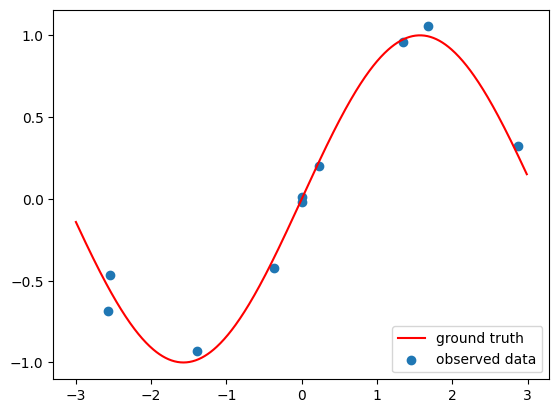

In [14]:
# In order to draw a graph of y = sin (x) smoothly,
# calculate the value of sin in increments of 0.01
# and display it as a line graph
xg = np.arange(-3, 3, 0.01)
yg = np.sin(xg)
plt.plot(xg, yg, "red", label="ground truth")

# Display the created data as a scatter plot diagram
plt.scatter(x, y, label="observed data")

plt.legend(loc = "lower right") # Display legend
plt.show()

<!-- JPN -->
　基本的には $y = \sin(x)$ に従っているが、 $y$ に関する観測誤差のためにわずかに上下に値がずれている。

<!-- ENG -->
　Basically, it follows $y = \sin(x)$, but the values ​​are slightly varied up and down due to the observation error regarding $y$.

<!-- JPN -->
### 2.2 | scikit-learnを利用した多項式回帰
　それでは、多項式回帰を行うことで、 $\sin(x)$ を3次関数 $\hat f(x) = \hat w_0 + \hat w_1x^1 + \hat w_2x^2 + \hat w_3x^3$ で近似してみる。ここで **$[s, t, u] = [x^1, x^2, x^3]$** という3つの説明変数を考えると、**3変数の線形回帰と全く同じ式**に帰着することができる。

<!-- ENG -->
### 2.2 | Polynomial regression using scikit-learn
　Now, let's approximate $\sin(x)$ by doing a polynomial regression with the cubic function $\hat f(x) = \hat w_0 + \hat w_1x^1 + \hat w_2x^2 + \hat w_3x^3$. If we consider the three explanatory variables, **$[s, t, u] = [x^1, x^2, x^3]$**, we can arrive at **the exact same equation as the linear regression of the three variables**.

![Figure 1](https://i.imgur.com/WuOonqI.png)

<!-- JPN -->
**線形回帰と多項式回帰の関係**  定数項は $w_0$ で表現している。

<!-- ENG -->
**Relationship between linear and polynomial regression** The constant term is represented by $w_0$.

<!-- JPN -->
　このことから、scikit-learnでは、以下の手順で3次多項式の回帰を実現する。

1. `PolynomialFeatures()` クラスを利用して スカラー値 $x$ を 3 個の説明変数 $[x_1, x_2, x_3]^T = [x^1, x^2, x^3]^T$ に拡張する。
2. $[x_1, x_2, x_3]^T$ を入力として、線形回帰 `LinearRegression()` を行うことで、 $\boldsymbol{\hat{w}} = [\hat w_1, \hat w_2, \hat w_3]^T, \hat b$ を推定する。


<!-- ENG -->
　Therefore, in scikit-learn, the following procedure is used to achieve cubic polynomial regression.

1. Use the `PolynomialFeatures()` class to extend the scalar value $x$ to three explanatory variables $[x_1, x_2, x_3]^T = [x^1, x^2, x^3]^T$.
2. Take $[x_1, x_2, x_3]^T$ as input and estimate $\boldsymbol{\hat w}^T = [\hat w_1, \hat w_2, \hat w_3]^T, \hat b$ by performing `LinearRegression()`.


<!-- JPN -->
　それでは早速 `PolynomialFeatures()` を使ってみよう。 `PolynomialFeatures()` は、以下のような基底関数 $\phi_i(x)$ の組を使って 1 変数の値を $p+1$ 変数の値に拡張する（正確には2変数以上の値も処理できるが、ここでは説明を割愛する）。

<!-- ENG -->
　Now let's try using `PolynomialFeatures()`. `PolynomialFeatures()` extends the value of one variable to the value of $p+1$ variables using a pair of basis functions $\phi_i(x)$ as follows (to be precise, it can handle more than two variables, but I will not explain it here).

$$
\phi(x) = \left[
  \begin{array}{c}
    \phi_0(x)\\
    \phi_1(x)\\
    \vdots\\
    \phi_p(x)
  \end{array}
\right] = \left[
  \begin{array}{c}
    1\\
    x\\
    \vdots\\
    x^p
  \end{array}
\right]
  $$

<!-- JPN -->
　ただし、これまでに説明したように `LinearRegression()` はそれ自体が定数項を追加するため、`PolynomialFeatures`が定数項を作成してしまうのは好ましくない。このような時は、 `PolynomialFeatures(include_bias=False)` と指定すれば、定数関数 $\phi_0(x) = x^0 = 1$ を除外して $p$ 変数の値に拡張することができる。

<!-- ENG -->
　As mentioned before, `LinearRegression()` itself adds a constant term, and thus it is not desirable that `PolynomialFeatures` creates a constant term. In such a case, you can specify `PolynomialFeatures(include_bias=False)` to exclude the constant function $\phi_0(x) = x^0 = 1$ and extend one variable $x$ to the $p$ variables.

<!-- JPN -->
`PolynomialFeatures()` 自体も入力として行列 $X$ を受け取るものになっている。2.1節で作成した $\boldsymbol{x}$ は行列になっていないので、行列表現に変換してから、 `PolynomialFeatures()` を利用する。

<!-- ENG -->
`PolynomialFeatures()` itself takes a matrix $X$ as input. Since the $\boldsymbol{x}$ created in Section 2.1 is not a matrix, we will convert it to a matrix representation and then use `PolynomialFeatures()`.

In [15]:
print(x)  # The original data is a one-dimensional array

[-2.54215026e+00  1.67951275e+00 -3.69544611e-01  1.34079107e+00
  2.86793707e+00  2.30975222e-01  6.72278196e-03 -2.56769320e+00
 -1.38936612e+00 -7.04995047e-04]


In [16]:
X = x.reshape(-1, 1) # Make a data matrix with N vertically arranged data consisting of a single feature.
print(X)

[[-2.54215026e+00]
 [ 1.67951275e+00]
 [-3.69544611e-01]
 [ 1.34079107e+00]
 [ 2.86793707e+00]
 [ 2.30975222e-01]
 [ 6.72278196e-03]
 [-2.56769320e+00]
 [-1.38936612e+00]
 [-7.04995047e-04]]


In [17]:
from sklearn.preprocessing import PolynomialFeatures

p = 3 # Use up to the 3rd order

# It can be converted by running fit_transform()
X_poly = PolynomialFeatures(degree=p, include_bias=False).fit_transform(X)
print(X_poly) # Note that the order is x^1, x^2, x^3

[[-2.54215026e+00  6.46252796e+00 -1.64287172e+01]
 [ 1.67951275e+00  2.82076309e+00  4.73750758e+00]
 [-3.69544611e-01  1.36563220e-01 -5.04662020e-02]
 [ 1.34079107e+00  1.79772069e+00  2.41036784e+00]
 [ 2.86793707e+00  8.22506305e+00  2.35889632e+01]
 [ 2.30975222e-01  5.33495534e-02  1.23224250e-02]
 [ 6.72278196e-03  4.51957973e-05  3.03841491e-07]
 [-2.56769320e+00  6.59304837e+00 -1.69289255e+01]
 [-1.38936612e+00  1.93033821e+00 -2.68194651e+00]
 [-7.04995047e-04  4.97018016e-07 -3.50395239e-10]]


<!-- JPN -->
　なお、`1.00e+01`とは、$1.00 \times 10^{1} = 10.0$ という意味である。あとは、これを使って `LinearRegression()` をすれば、多項式回帰が行えるはずである。

<!-- ENG -->
　Note that `1.00e+01` means that $1.00\times 10^{1} = 10.0$. Next, we can use this to do `LinearRegression()`, and thus we should be able to carry out polynomial regression.

------

<!-- JPN -->
#### 課題 2

　上記の特徴量を用いて線形回帰を行うことで、多項式回帰が実現される。
ここまでに実行した線形回帰のコードを参考に、`LinearRegression()` を用いて線形モデルを構築し、`lr_model.coef_` および `lr_model.intercept_` を出力せよ。

<!-- ENG -->
#### Exercise 2

　Polynomial regression is performed by performing linear regression using the above feature.
Using the linear regression code you ran previously as a reference, build a linear model using `LinearRegression()` and output `lr_model.coef_` and `lr_model.intercept_`.

In [19]:
# CODE CELL FOR YOUR ANSWER

lr_model = LinearRegression().fit(X_poly, y)

print(lr_model.coef_)
print(lr_model.intercept_)

[ 0.88826173  0.01289468 -0.09787829]
-0.019777066515021743


-------

<!-- JPN -->
#### 課題 3

　課題 2 の結果を解釈しよう。推定された3次関数式 $\hat f(x)$ を答えよ。ただし、課題 2 と同様に、係数は全て**小数点以下第4位を四捨五入し**、`f(x) = ax^3 + bx^2 + cx + d` の形式でレポートに記述せよ。

<!-- ENG -->
#### Exercise 3

　Interpret the results of exercise 2. Answer the estimated cubic function equation $\hat f(x)$. However, as in exercise 2, **round off all coefficients to three decimal places**, and write your report in the form `f(x) = ax^3 + bx^2 + cx + d`.

In [21]:
coefficients = lr_model.coef_.flatten()
intercept = lr_model.intercept_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

f_x = f"f(x) = {rounded_coefficients[2]}x^3 + {rounded_coefficients[1]}x^2 + {rounded_coefficients[0]}x + {round(intercept, 3)}"
print(f_x)

f(x) = -0.098x^3 + 0.013x^2 + 0.888x + -0.02


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

f(x) = -0.098x^3 + 0.013x^2 + 0.888x + -0.02

-------

<!-- JPN -->
### 2.3 | `make_pipeline()` を利用したモデルの構築

　今回の予測は、「多項式の特徴量作成」と「線形回帰」という複数のステップを踏んだ。このような場合、いちいち途中結果を出力することなく、複数のステップを1つにまとめたモデルを作る`make_pipeline()`が利用可能である。ただし、`make_pipeline()`を利用すると重みを取り出すためにひと手間必要になるので注意が必要だ。

<!-- ENG -->
### 2.3 | Building a model using `make_pipeline()`

　Our prediction so far took multiple steps that are "polynomial feature generation" and "linear regression." Alternatively, we can use `make_pipeline()` which constructs a model by combining multiple steps into one without having to output the results of each step. Note, however, that if you use `make_pipeline()`, you will need to do a little work to get the weights.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

p = 3 # Use up to the 3rd order

# Input make_pipeline (1st process, 2nd process, ...) in the order being processed.
model_polyreg = make_pipeline(
    PolynomialFeatures(degree=p, include_bias=False),
    LinearRegression())

# You can simply use fit() even when processing multiple calculations
X = x.reshape(-1, 1)
model_polyreg.fit(X, y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [23]:
# Since LinearRegression is the second element of Pipeline,
# access the contents of LinearRegression as model_polyreg[1].
print(model_polyreg[1].coef_)
print(model_polyreg[1].intercept_)

[ 0.88826173  0.01289468 -0.09787829]
-0.019777066515021743


<!-- JPN -->
### 2.4 結果の描画とパラメータ $p$ の調整

　ところで予測された $\hat f(x)$ はどれほど $\sin(x)$ に似ているだろうか。グラフを描画して確認してみる。

<!-- ENG -->
### 2.4 Drawing the results and adjusting parameter $p$

　How similar is the predicted $\hat f(x)$ to $\sin(x)$, by the way? Check it by drawing a graph.

In [24]:
# Function to do all drawings
# x, y are one-dimensional arrays
def draw(x, y, model):
  # Scatter plot diagram of data points used for machine learning
  plt.scatter(x, y, label="observed data")

  # Draw sin(x)
  xg = np.arange(-3, 3, 0.01)
  yg = np.sin(xg)
  plt.plot(xg, yg, "red", label="ground truth")

  # Draw the estimated f(x)
  Xg = xg[:, np.newaxis] # Convert it into matrix
  y_est = model.predict(Xg)
  plt.plot(xg, y_est, "blue", label="estimation")

  # Plotting processing
  plt.legend(loc = "lower right") # Display legend
  plt.show()

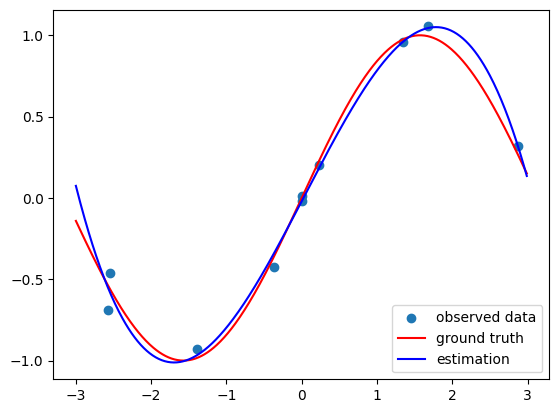

In [25]:
# Input the first data x, y and the model created with pipeline.
draw(x, y, model_polyreg)

<!-- JPN -->
　本来の関数が赤いグラフ、今回推定した $\hat f(x)$ が青いグラフとなっている。かなり良い近似が得られているようだ。

<!-- ENG -->
　The original function is shown as a red graph, and the estimated $\hat f(x)$ is shown as a blue graph. It seems we are getting a pretty good approximation.

<!-- JPN -->
　さて、描画結果を見ることができるようになり、予測結果の良しあしを（主観的ながら）考えることができるようになったので、近似する多項式の次数 $p$ の値を変更させてみて、どのように関数形状が変化するか確認してみる。$p = 1$ から $p = 9$ まで変更させながら、関数の形状が本来の関数とどの程度類似するかを確認してみよ。

<!-- ENG -->
　Now that we can see the results of the drawing, we can consider (subjectively) whether the prediction is good or bad, so let's try changing the value of order $p$ of the polynomial to be approximated and see how the function shape changes. Observe how similar the shape of the function is to that of the original function as you change from $p = 1$ to $p = 9$.

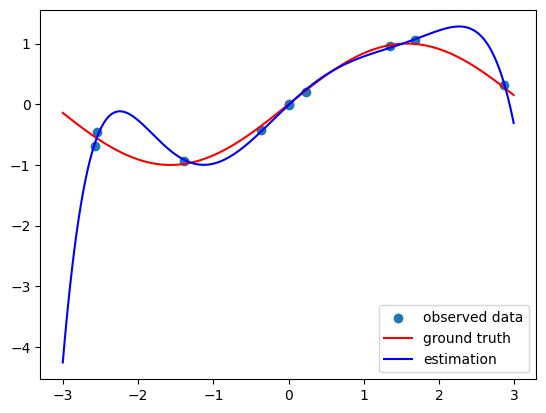

In [26]:
p = 6 # This is the order of the polynomial. Let's try to vary it from one to nine

model_polyreg = make_pipeline(
    PolynomialFeatures(degree=p, include_bias=False),
    LinearRegression())
X = x.reshape(-1, 1)
model_polyreg.fit(X, y)
draw(x, y, model_polyreg)

<!-- JPN -->
　多項式の次数 $p$ が増えるに従い推定された関数 (estimation) と真の関数 (ground truth) の形状が似てくるのだが、$p = 5$ あたりから推定された関数の形状が $\sin(x)$ とかみ合わなくなり始め、 $p = 6$ 以降では全く関数形状が推定できなくなってしまう。

　$p = 6$の場合、3次多項式の要素 $x^1, x^2, x^3$ は全て含まれており、3次多項式と同程度以上の高精度な予測が期待できるはずなのだが、$x^4, x^5, x^6$ の情報を使って観測データをより詳細に、**観測誤差までも**予測しようとし、結果として元の関数の形状を推定できなくなっている。これは**過剰適合(overfitting, 過学習ともいう)** と呼ばれる現象であり、**データ数が少なく、説明変数が多い時**に特に発生しやすい（**補足資料 ※1**）。

<!-- ENG -->
　As the order $p$ of the polynomial increases, the shape of the estimated function (estimation) and the true function (ground truth) become more and more similar, but around $p = 5$, the shape of the estimated function starts to no longer match $\sin(x)$, and after $p = 6$, the function shape cannot be estimated at all.

　In the case of $p = 6$, all the elements $x^1, x^2, x^3$ of the cubic polynomial are included, and we should expect a prediction as accurate or better than the cubic polynomial, but the information of $x^4, x^5, x^6$ is also used to predict the observed data in more detail, **even the observation error**, and as a result, we cannot estimate the shape of the original function. This is a phenomenon called **overfitting**, which is especially likely to occur **when the number of data is small and the number of explanatory variables is large** (**Supplementary Material S1**).

----

<!-- JPN -->
#### 課題 4
先ほどはグラフの一致度合いを目視することで予測モデルの良さを評価したが、定量的な「値」にすることでより明確に比較を行う。

$p=3$ および $p=6$ の多項式回帰予測モデル `third_order_model` および `sixth_order_model` を再度構築し、以下に示す `test_x` をそれぞれ予測、予測結果と `test_y` との二乗平均平方根誤差 RMSE `rmse_3` および `rmse_6` を求めよ。

<!-- ENG -->
#### Exercise 4
Previously, we evaluated the goodness of the prediction models by visual inspection of the agreement of the graphs. We will make the comparison more clearly by making it into a quantitative "value".

Constructing polynomial regression prediction model for $p=3$ (`third_order_model`) and $p=6$ (`sixth_order_model`) again, predict `test_x` shown below, respectively, and calculate the root mean square error RMSE `rmse_3` and `rmse_6` between the prediction result and `test_y`.

In [27]:
test_x = np.array([-2.93, 1.63, 0.26, -2.15, -1.35, 2.53, 0.27,  0.01, -2.70, -1.42])
test_y = np.array([-0.11, 1.06, 0.19, -0.85, -0.93, 0.55, 0.24, -0.14, -0.37, -0.98])

<!-- JPN -->
なお、二乗平均平方根誤差 RMSE は二乗平均誤差 MSE の正の平方根であり、scikit-learnの関数を利用して以下のように計算することができる。

<!-- ENG -->
Note that the root mean square error (RMSE) is the positive square root of the root mean square error (MSE) and can be calculated using the scikit-learn function as follows.

In [28]:
from sklearn.metrics import mean_squared_error

true_y = np.array([1.0, 2.0, 3.0])
pred_y = np.array([0.8, 2.1, 3.1])
rmse = np.sqrt(mean_squared_error(true_y, pred_y))
print(rmse)

0.14142135623730953


In [29]:
# CODE CELL FOR YOUR ANSWER

test_x_reshaped = test_x.reshape(-1, 1)
test_y_reshaped = test_y.reshape(-1, 1)

# Third-order polynomial regression
poly_features_3 = PolynomialFeatures(degree=3)
test_x_poly_3 = poly_features_3.fit_transform(test_x_reshaped)

third_order_model = LinearRegression()
third_order_model.fit(test_x_poly_3, test_y_reshaped)

predicted_y_3 = third_order_model.predict(test_x_poly_3)

rmse_3 = np.sqrt(mean_squared_error(test_y_reshaped, predicted_y_3))
print("RMSE for third-order model:", rmse_3)

# Sixth-order polynomial regression
poly_features_6 = PolynomialFeatures(degree=6)
test_x_poly_6 = poly_features_6.fit_transform(test_x_reshaped)

sixth_order_model = LinearRegression()
sixth_order_model.fit(test_x_poly_6, test_y_reshaped)

predicted_y_6 = sixth_order_model.predict(test_x_poly_6)

rmse_6 = np.sqrt(mean_squared_error(test_y_reshaped, predicted_y_6))
print("RMSE for sixth-order model:", rmse_6)

RMSE for third-order model: 0.056903900823927094
RMSE for sixth-order model: 0.02860143966643141


----

<!-- JPN -->
## 3 | 過剰適合を防ぐ正則化（Ridge回帰; Ridge regression）

　第2章の結果から、多項式の次元数 $p$ が非常に大きい時、多項式回帰の結果は過剰適合していることが分かった。
これを避ける工夫として広く用いられているのが **Ridge回帰**である。

<!-- ENG -->
## 3 | Norm regularization to prevent overfitting (Ridge regression）

　In Section 2, we found that when the order $p$ of the polynomial is very large, the results of the polynomial regression are overfitted.
**Ridge regression** is a widely used method to avoid this problem.

<!-- JPN -->
### 3.1 | scikit-learnの`Ridge()`を利用したRidge回帰の実施

<!-- ENG -->
### 3.1 | Performing ridge regression using `Ridge()` in scikit-learn

<!-- JPN -->
　Ridge回帰はscikit-learnに`Ridge()`として定義されているので、これを利用して過剰適合を抑えてみる。 `Ridge()` には L2 正則化項の重み `alpha` をパラメータとして与える必要がある。`alpha` の値が大きいほど、過剰適合を抑えることができるはずだ。

　以下のコードの `alpha = 0.1` の部分を様々な値に変更させながら、推定された関数形状を確認してみよ。

<!-- ENG -->
　Ridge regression is defined in scikit-learn as `Ridge()`, so we will try to use it to prevent overfitting. `Ridge()` needs to be given the weight `alpha` of the L2 norm regularization term as a parameter. The higher the `alpha` value, the less overfitting there is.

　Let's check the estimated function shape while changing the `alpha = 0.1` part of the following code to various values.

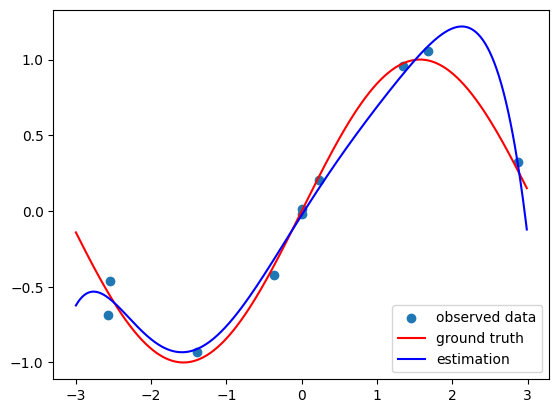

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

p = 6
alpha = 0.1

model_poly_ridge = make_pipeline(
    PolynomialFeatures(degree=p, include_bias=False),
    Ridge(alpha=alpha))
X = x.reshape(-1, 1)
model_poly_ridge.fit(X, y)
draw(x, y, model_poly_ridge)

<!-- JPN -->
　どうだろうか。正しく機能しているだろうか。**実はこれだけではなかなかうまくいかない**。

　Ridge回帰の式を再度考えてみよう。Ridge回帰では、**損失関数**（今回の場合は平均二乗誤差）**と、モデルの複雑さを制御する L2 正則化項** (L2 norm regularization term) **の和が最小になるように重み $\boldsymbol{w}$ を決定**する。（「モデルの複雑さ」については、今回の場合はグラフの荒ぶり度合いを想像すればよい）

<!-- ENG -->
　What do you think? Is it working properly?  **In fact, this is not quite enough to make it work**.



　Let's consider the ridge regression equation again. In Ridge regression, **the weights $\boldsymbol{w}$ are determined so that the sum of the loss function** (mean squared error in this case) **and the L2 norm regularization term that controls the complexity of the model is minimized**. (For "model complexity", in this case you can imagine from how rough the graph is)

$$\frac{1}{n} \sum^n_{i=1} l(f(\boldsymbol{x}_{(i)}),y_i) + \lambda||\boldsymbol{w}||^2_2$$

<!-- JPN -->
この式の中で $\lambda||\boldsymbol{w}||^2_2$ が正則化項である。この式から、正則化項の重み $\lambda$ （sklearnでは`alpha`）を各重み **$w_i$ に対して均等に**効かせる。

　一方、値の幅が大きい特徴量（今回の場合、$x^1$ よりも $x^6$ の方が値の幅（＝分散）が大きくなっているはずである）の重み $\boldsymbol{w}$ は一般に小さくなるので、正則化項の重み $\lambda$ (`alpha`) の効き目が弱くなってしまうのである（**補足資料 ※2**）。

　このように、**値の幅が異なる説明変数に対してRidge回帰を適用する場合には、特徴量の値を平均0、分散1にそろえる標準化 (Standardization) を行う**と良い。標準化を行う場合は、`make_pipeline`の`Ridge`の前に`StandardScaler()`を導入する。

<!-- ENG -->
In this equation, $\lambda |\boldsymbol{w}|_2^2$ is the norm regularization term. From this equation, the weight of the norm regularization term $\lambda$ (`alpha` in scikit-learn) is applied **equally to each weight $w_i$**.

　On the other hand, the weight $\boldsymbol{w}$ of a feature with a large range of values (in this case, the range of values (= variance) should be larger for $x^6$ than for $x^1$) is generally small, so the effect of the weight $\lambda$ (`alpha`) of the norm regularization term becomes weaker (**Supplementary Material S2**).

　Thus, **when ridge regression is applied to explanatory variables with different value ranges, it is recommended to perform standardization to align the values of the features to mean 0 and variance 1.** To standardize, introduce `StandardScaler()` before the `Ridge` in `make_pipeline`.

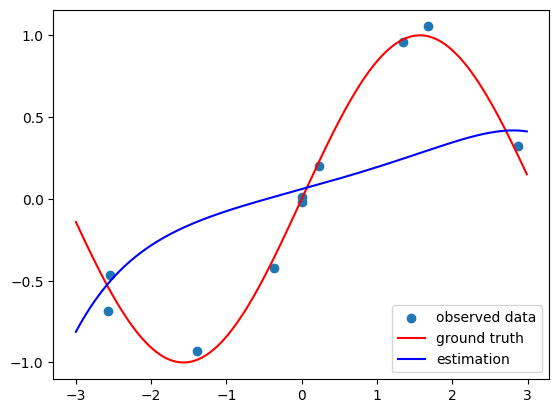

In [35]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

p = 6
alpha  = 10

model_poly_ridge = make_pipeline(
    PolynomialFeatures(degree=p, include_bias=False),
    StandardScaler(),
    Ridge(alpha=alpha))
model_poly_ridge.fit(X, y)

draw(x, y, model_poly_ridge)

<!-- JPN -->
　これを行うことで、高次の項まで利用した場合でも、だいぶ本来の $y = \sin(x)$ に近い関数形状を推定することができた。このように、Ridge回帰は過剰適合を抑えることができる。

　ただしその一方で、この予測された関数は**3次多項式による近似に比べると関数形状の推定が僅かに悪い**ことには注意する必要がある。**予測すべき対象の関数の概形が既知**で、それに対して**適切な関数（モデル）が理論や人間の感覚から推定できる**のであれば、**それより複雑なモデルを導入しても通常良い結果はもたらさない**ということは、覚えておくと良いだろう。（**補足資料 ※3**）

<!-- ENG -->
　By doing this, we were able to estimate a function shape that is much closer to the original $y = \sin(x)$, even when using higher order terms. In this way, ridge regression can prevent overfitting.

　On the other hand, it should be noted that this predicted function gives **a slightly worse estimation of the function shape than the approximation by a cubic polynomial**. It is worth remembering that if **the approximate form of the function to be predicted is known**, and **an appropriate function (model) for it can be estimated from theory or human intuition**, then **introducing a more complex model will not usually produce good results**. (**Supplementary Material S3**)

-----------

<!-- JPN -->
#### 課題 5

　上記の資料では、Ridge回帰の `alpha` を0.1としていた。この値を $\alpha = 1$ や $\alpha = 10$ と大きくしていった場合にestimationのグラフはどう変化するだろうか。`StandardScaler()`を含めたRidge回帰パイプラインに対して様々な $\alpha$ を適用し、簡潔に解答せよ。


<!-- ENG -->
#### Exercise 5

　In the above document, the ridge regression `alpha` was set to 0.1. How does the estimation graph change if this value is increased to $\alpha = 1$ or $\alpha = 10$? Apply various $\alpha$ to the ridge regression pipeline, including `StandardScaler()`, and give a concise answer.


<!-- JPN -->
<font color=orange> **このテキストセルをダブルクリックし答案を記述せよ。** </font>
<!-- この下の行から答案を記述 -->


<!-- ENG -->
<font color=orange> **Double-click this text cell and write your answer.** </font>
<!-- From the next line, write your answer -->

When alpha value is increased to $\alpha = 1$ or $\alpha = 10$, higher alpha values tend to reduce overfitting but might lead to simpler models that may underfit the data.


----

<!-- JPN -->
#### 課題 6

　課題 5 で示したように、 $\alpha$ の値は予測結果に大きな影響を与え、かつ最適な $\alpha$ の値はその時々によって変化してしまう。また、ハイパーパラメータの選択肢が膨大になった場合には主観的なモデル選択は困難である。
そこで、`GridSearchCV()` を用いて、**5-fold 交差検証法 (cross validation)** による $\alpha \in [10^{-4}, 10^{-3}, ..., 10^{0}, 10^1]$ のハイパーパラメータ探索を行い、この回帰問題における最適な $\alpha$ の値 `best_alpha` を推定せよ。

　なお、pipelineの中のモデルに対して`GridSearchCV()`を行うのは簡単ではないため（不可能ではない）、以下のコードを参考に、Ridge回帰部分のみに対して`GridSearchCV()`を実施せよ。

<!-- ENG -->
#### Exercise 6

　As shown in Exercise 5, the value of $\alpha$ has a significant impact on the prediction results, and the optimal value of $\alpha$ can vary from time to time. In addition, subjective model selection is difficult when the choice of hyperparameters becomes significantly large.
Using `GridSearchCV()` , perform an $\alpha \in [10^{-4}, 10^{-3}, ..., 10^{0}, 10^1]$ hyperparameter search using **5-fold cross validation**, and estimate the optimal value of $\alpha$ for this regression problem (`best_alpha`).

　Note that it is not easy (but not impossible) to perform `GridSearchCV()` on the models in the pipeline, so refer to the following code and perform `GridSearchCV()` only on the ridge regression part.

In [39]:
# CODE CELL FOR YOUR ANSWER

from sklearn.model_selection import GridSearchCV

p = 6
param_grid = {'alpha': [10**i for i in range(-4, 2)]}
X_poly = PolynomialFeatures(degree=p, include_bias=False).fit_transform(X)
ss = StandardScaler()
X_poly_standardized = ss.fit_transform(X_poly)

ridge = Ridge()

grid_search_ridge = GridSearchCV(ridge, param_grid=param_grid, cv=5)
grid_search_ridge.fit(X_poly_standardized, y)

best_alpha = grid_search_ridge.best_params_['alpha']

print("Best alpha:", best_alpha)

Best alpha: 0.01


----

<!-- JPN -->
#### 課題 7（発展）

課題6で得られた最適パラメータを用いて Ridge 回帰予測モデルを構築し、 `test_x` に対する予測を行い、`test_y` との比較を行うことでRMSE `test_rmse` を計算せよ。

<!-- ENG -->
#### Exercise 7 (Advanced)
Constructing the ridge regression prediction model with the best parameter determined in Exercise 6, predict for `test_x` and compare with `test_y` to compute the RMSE `test_rmse`.

In [40]:
test_x = np.array([-2.93, 1.63, 0.26, -2.15, -1.35, 2.53, 0.27,  0.01, -2.70, -1.42])
test_y = np.array([-0.11, 1.06, 0.19, -0.85, -0.93, 0.55, 0.24, -0.14, -0.37, -0.98])

In [41]:
# CODE CELL FOR YOUR ANSWER

test_x_reshaped = test_x.reshape(-1, 1)
test_y_reshaped = test_y.reshape(-1, 1)

poly_features = PolynomialFeatures(degree=p, include_bias=False)
test_x_poly = poly_features.fit_transform(test_x_reshaped)

ss = StandardScaler()
test_x_poly_standardized = ss.fit_transform(test_x_poly)

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_poly_standardized, y)

predicted_y = ridge.predict(test_x_poly_standardized)

test_rmse = np.sqrt(mean_squared_error(test_y_reshaped, predicted_y))
print("Test RMSE:", test_rmse)

Test RMSE: 0.16470763826777948


-------------------

<!-- JPN -->
#### 課題 8（実践、提出不要）

　NumPyを用いて**Ridge回帰**と**特徴量の標準化**を実装し、予測されたグラフがほぼ同一になることを確認せよ。

<!-- ENG -->
#### Exercise 8 (Practical, not required to submit)

　Implement **ridge regression** and **feature standardization** using NumPy, and verify that the predicted graphs are nearly identical.

-------

<!-- JPN -->
# 補足資料



<!-- ENG -->
# Supplementary Material



<!-- JPN -->
## ※1 サンプルサイズが大きければ過剰適合は起きにくい

　今回の資料では、サンプルサイズが10件のサンプル（データセット）から `sin(x)` の形状を推定することを行い、6次多項式など、高次多項式を利用すると過剰適合が発生することを確認した。

　その説明の中で、「**データ数が少なく**、説明変数が多い時に過剰適合 (overfitting) が発生しやすい」と記載されていたものの、データ数を増やした場合の評価を行うことなく、Ridge回帰に話が進んでしまった。そこで、補足資料として**データ数が10件ではなく1000件**であった時に、6次多項式を用いてみる。

　以下のコードを実行してみると、データ数が1000件もあると、Ridge回帰を導入するまでもなく、**3次多項式よりも6次多項式の方がよい関数推定を行うことができる**。
`sin(x)`はテイラー展開を考えると、無限次元の多項式を用いないと完全再現できないため、データ数が十分に多ければ多項式の次数は高い方が良い関数推定を行うことができる。モデルの柔軟性（多項式回帰なら次元数 $p$ ）は、予測したい対象の関数の想定される形状と、データ数と相談しながら決定するのが望ましそうだ。

<!-- ENG -->
## S1 The larger the sample size, the less likely it is that overfitting will occur

　In these materials, we estimated the shape of `sin(x)` from a sample (data set) with a sample size of 10, and confirmed that overfitting occurs when higher order polynomials, such as 6th order polynomials are used.

　In the explanation, it was stated that "overfitting tends to occur when **the number of data is small** and the number of explanatory variables is large," but the conversation carried forward to ridge regression without evaluating the case where the number of data was increased. Therefore, as supplementary material, when **the number of data is 1000 instead of 10**, try using a 6th order polynomial.

　When we run the following code, we can see that when we have 1000 data, **the 6th order polynomial gives a better function estimation than a cubic polynomial**, even without the introduction of ridge regression.
Considering the Taylor series, `sin(x)` cannot be fully reproduced without using an infinite dimensional polynomial, so if the number of data is large enough, the higher the order of the polynomial is, the better the function estimation can be performed. The flexibility of the model (order $p$ for polynomial regression) should be determined by considering the expected function shape to be predicted and the number of data.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

In [43]:
# create toy data set
np.random.seed(3) # A trick that allows you to create the same random data every time.

n_data = 1000
huge_x = 6 * np.random.rand(n_data) - 3    # Randomly generate 1000 values ​​from -3 to 3
noise = 0.1 * np.random.randn(n_data)      # Noise
huge_y = np.sin(huge_x) + noise            # Calculate y = sin (x) + noise

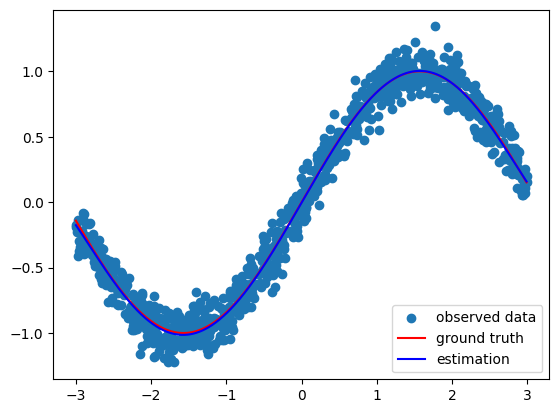

In [44]:
p = 6 # Use up to the 6th order

# Input make_pipeline (1st process, 2nd process, ...) in the order being processed.
model = make_pipeline(PolynomialFeatures(degree=p, include_bias=False),
                              LinearRegression())

# You can simply use fit() even when processing multiple calculations
huge_X = huge_x[:, np.newaxis]
model.fit(huge_X, huge_y)
draw(huge_x, huge_y, model)

<!-- JPN -->
　実応用時には人間の行動など、関数形状が予測困難なことが多く、結局Ridge回帰などの正則化を使うことが多いが、**簡単にデータ数を増やせるのであれば、それによって予測精度を改善できることがほとんど**である（簡単にデータを取ることができないから予測したい、という欲求が生まれる訳だが…）。

<!-- ENG -->
　In practical applications, the function shape is often difficult to predict, such as in the example of human behavior, and norm regularization such as ridge regression is often used in the end, **but if the number of data can be easily increased, the prediction accuracy can almost always be improved by doing so**. (We can't get the data easily, which is why we want to predict...)

<!-- JPN -->
## ※2 標準化が必要な理由

　身長と体重から何らかの値をRidge回帰を使って予測することを考える。この時、身長を[m]で表現するか、[cm]で表現するかによって、身長に対する重み $w_h$ は、100倍変化するはずである。

　一方、Ridge回帰は以下の誤差関数を最小化する。


<!-- ENG -->
## S2 Why standardization is necessary



　Consider using ridge regression to predict some value from height and weight. At this time, depending on whether the height is expressed in [m] or [cm], the weight $w_h$ for the height should change by a factor of 100.



　On the other hand, ridge regression minimizes the following error function.



$$\frac{1}{n} \sum^n_{i=1} l(f(\boldsymbol{x}_{(i)}),y_i) + \lambda||\boldsymbol{w}||^2_2$$

<!-- JPN -->
正則化項 $\lambda||\boldsymbol{w}||^2_2$ を見ると、$\boldsymbol{w}$ が100倍大きい方が正則化のペナルティが大きくなるため、身長[m]に対する重みが厳しく制限され、身長[cm]を利用した場合と異なる予測がなされてしまう。

　本質的には何も差がないはずの身長の[m]と[cm]の表現で、結果を一致させるためには、説明変数を予め同じ値の幅に整えることがよく、それが標準化という操作になっているのである。


<!-- ENG -->
Looking at the norm regularization term $\lambda||\boldsymbol{w}||^2_2$, the penalty for norm regularization is larger when $\boldsymbol{w}$ is 100 times larger, so the weights for height [m] are severely limited, and the prediction is different than when using height [cm].

　In order to match the results in the expression of [m] and [cm] for height, which should not differ in any essential way, it is better to adjust the explanatory variables to the same range of values in advance, which is the operation of standardization.


<!-- JPN -->
## ※3 予測対象に適したモデルの構築

　今回対象とした $\sin(x)$ は、テイラー展開を考えると、有限次数の多項式では厳密な表現は不可能である。そのため、（十分なデータがあるという仮定のもとで）多項式近似の次数を高めれば高めるほど予測精度は高まるはずである。一方で、今回学んだように次数を高めると過剰適合の可能性が高くなるので、多項式近似の次数はどこかで折り合いをつける必要がある。

　このような場合は、**次数を上げても予測精度がほとんど向上しない場合は、なるべく次数の低いモデルを選ぶと良い**とされる（機械学習における「オッカムの剃刀」と言われることもある）。

　本来、このことは基盤データサイエンスで学んだ AIC (Akaike's information criterion) や BIC (Bayesian information criterion) を導入して定量的に議論すべき点なのだが、Ridge回帰などの正則化項が加わると議論が難しくなるため、ここでは割愛する。


<!-- ENG -->
## S3 Building a model that is appropriate for the prediction target

　Considering the Taylor series, it is impossible to precisely represent $\sin(x)$ we used as the target this time in the polynomial of a finite order. Therefore, the higher the order of the polynomial approximation has (under the assumption that there is enough data), the higher the prediction accuracy should be. On the other hand, as we have learned, increasing the order raises the possibility of overfitting, so the order of polynomial approximation needs to be settled somewhere.

　In such cases, **when the prediction accuracy is hardly improved by increasing the order, it is better to choose a model with as low an order as possible** (sometimes referred to as "Occam's razor" in machine learning).

　Originally, this is a point that should be discussed quantitatively by introducing AIC (Akaike's information criterion) and BIC (Bayesian information criterion), which is learned in Exercises in Fundamentals of Data Science, but it becomes complex when norm regularization terms such as ridge regression are added, so I will not discuss it here.
